In [1]:
import numpy as np
import regions, astropy, matplotlib
from regions import CirclePixelRegion
from regions.core import PixCoord
import matplotlib.pyplot as plt
%matplotlib inline

print('Running on:')
print('\tNumpy\t\t{}'.format(np.__version__))
print('\tAstropy\t\t{}'.format(astropy.__version__))
print('\tRegions\t\t{}'.format(regions.__version__))
print('\tMatplotlib\t{}'.format(matplotlib.__version__))

Running on:
	Numpy		1.15.4
	Astropy		3.1.1
	Regions		0.3
	Matplotlib	2.2.3


In [2]:
def gen_data():
    x = np.random.normal(size=100000)
    y = np.random.normal(size=100000)
    data = np.histogram2d(x,y,bins=21)[0]
    return data


def masking_one(data):
    """
    Attempting to obtain "nan" value for pixels outside the mask region, using the "fill_value" parameter.
    """
    region = CirclePixelRegion(PixCoord(10,10),5)
    mask = region.to_mask()
    masked_data = mask.multiply(data, fill_value=np.nan)
    
    # Plotting
    plt.figure(figsize=(20,6))
    plt.subplot2grid((1,3),(0,0))
    plt.imshow(data)
    region.plot(color='r',lw=2)
    plt.colorbar()
    plt.title('input data')
    plt.subplot2grid((1,3),(0,1))
    plt.imshow(mask.data)
    plt.colorbar()
    plt.title('mask')
    plt.subplot2grid((1,3),(0,2))
    plt.imshow(masked_data)
    plt.title('masked data')
    plt.colorbar()
    plt.show()
    

def masking_two(data):
    """
    Demonstrating the desired outcome for pixels outside the mask area
    by forcing the zeroes in the mask to become the desired value
    """
    region = CirclePixelRegion(PixCoord(10,10),5)
    mask = region.to_mask()
    mask.data[mask.data == 0] = np.nan      # This line is the only difference between masking_one and masking_two
    masked_data = mask.multiply(data, fill_value=np.nan)

    # Plotting
    plt.figure(figsize=(20,6))
    plt.subplot2grid((1,3),(0,0))
    plt.imshow(data)
    region.plot(color='r',lw=2)
    plt.colorbar()
    plt.title('input data')
    plt.subplot2grid((1,3),(0,1))
    plt.imshow(mask.data)
    plt.colorbar()
    plt.title('mask')
    plt.subplot2grid((1,3),(0,2))
    plt.imshow(masked_data)
    plt.title('masked data')
    plt.colorbar()
    plt.show()

/home/arash/anaconda3/lib/python3.6/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


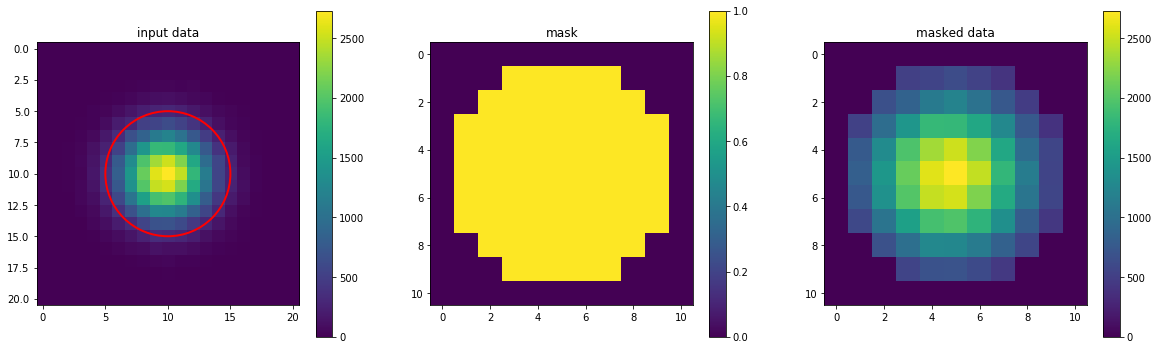

In [3]:
test_data = gen_data()
masking_one(test_data)

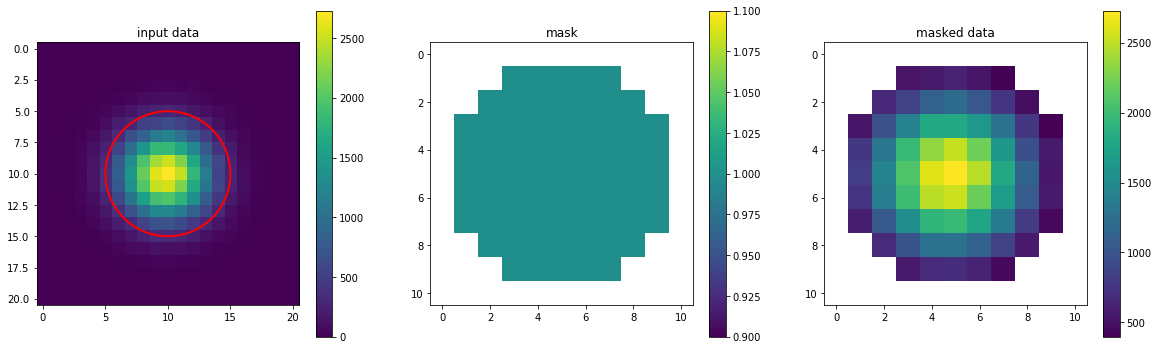

In [4]:
masking_two(test_data)